In [76]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import statsmodels.api as sm

Set up the time period for 1 hour

In [6]:
req = requests.get('https://api.cryptowat.ch/markets/bitfinex/btcusd/ohlc', params={'periods': '3600'})
data = req.json()

In [7]:
data

{'result': {'3600': [[1629338400,
    45052,
    45213,
    44881,
    44963,
    180.987398,
    8150939.061954567],
   [1629342000,
    44962.72284397,
    44962.72284397,
    44620,
    44620,
    238.82703233,
    10680311.311654815],
   [1629345600, 44620, 44625, 44090, 44091, 436.83688533, 19325616.792945478],
   [1629349200,
    44091,
    44336.89642893,
    43992,
    44152,
    315.14996115,
    13901794.0589484],
   [1629352800, 44157, 44500, 44049, 44440, 120.7525267, 5355232.570959138],
   [1629356400, 44438, 44505, 44252, 44393, 74.99540528, 3328594.280176563],
   [1629360000, 44397, 44650, 44224, 44650, 548.12837228, 24350055.5275007],
   [1629363600, 44650, 45000, 44371, 44705, 623.77944862, 27887760.854057685],
   [1629367200, 44712, 44882, 44633, 44806, 110.2679408, 4939223.218699443],
   [1629370800, 44795, 44863, 44368, 44395, 120.6616008, 5378038.6611460885],
   [1629374400,
    44394.7078431,
    44495,
    44222,
    44231,
    70.03646767,
    3107205.7462719968

In [12]:
df = pd.DataFrame(data['result']['3600'], columns=[
    'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'QuoteVolume'
])

In [13]:
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,QuoteVolume
0,1629338400,45052.000000,45213.000000,44881.0,44963.0,180.987398,8.150939e+06
1,1629342000,44962.722844,44962.722844,44620.0,44620.0,238.827032,1.068031e+07
2,1629345600,44620.000000,44625.000000,44090.0,44091.0,436.836885,1.932562e+07
3,1629349200,44091.000000,44336.896429,43992.0,44152.0,315.149961,1.390179e+07
4,1629352800,44157.000000,44500.000000,44049.0,44440.0,120.752527,5.355233e+06


In [14]:
df.drop(columns=['QuoteVolume'], inplace=True)

In [15]:
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
0,1629338400,45052.000000,45213.000000,44881.0,44963.0,180.987398
1,1629342000,44962.722844,44962.722844,44620.0,44620.0,238.827032
2,1629345600,44620.000000,44625.000000,44090.0,44091.0,436.836885
3,1629349200,44091.000000,44336.896429,43992.0,44152.0,315.149961
4,1629352800,44157.000000,44500.000000,44049.0,44440.0,120.752527


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CloseTime   1000 non-null   int64  
 1   OpenPrice   1000 non-null   float64
 2   HighPrice   1000 non-null   float64
 3   LowPrice    1000 non-null   float64
 4   ClosePrice  1000 non-null   float64
 5   Volume      1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [32]:
df.isnull().sum()

OpenPrice     0
HighPrice     0
LowPrice      0
ClosePrice    0
Volume        0
dtype: int64

In [33]:
df.isna().sum()

OpenPrice     0
HighPrice     0
LowPrice      0
ClosePrice    0
Volume        0
dtype: int64

In [17]:
df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')

In [19]:
df.set_index('CloseTime', inplace=True)

In [20]:
df.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2021-08-19 02:00:00,45052.000000,45213.000000,44881.0,44963.0,180.987398
2021-08-19 03:00:00,44962.722844,44962.722844,44620.0,44620.0,238.827032
2021-08-19 04:00:00,44620.000000,44625.000000,44090.0,44091.0,436.836885
2021-08-19 05:00:00,44091.000000,44336.896429,43992.0,44152.0,315.149961
2021-08-19 06:00:00,44157.000000,44500.000000,44049.0,44440.0,120.752527


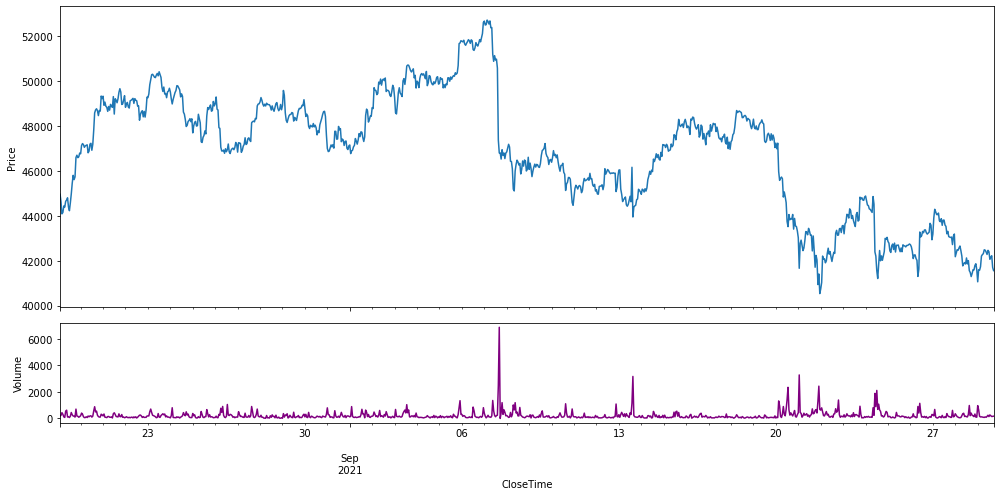

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
df['ClosePrice'].plot(ax=ax1)
ax1.set_xlabel('Close Time')
ax1.set_ylabel('Price')

df['Volume'].plot(ax=ax2, color='purple')
ax2.set_ylabel('Volume')

fig.tight_layout()

In [61]:
df2 = df.copy()
df2.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2021-08-19 02:00:00,45052.000000,45213.000000,44881.0,44963.0,180.987398
2021-08-19 03:00:00,44962.722844,44962.722844,44620.0,44620.0,238.827032
2021-08-19 04:00:00,44620.000000,44625.000000,44090.0,44091.0,436.836885
2021-08-19 05:00:00,44091.000000,44336.896429,43992.0,44152.0,315.149961
2021-08-19 06:00:00,44157.000000,44500.000000,44049.0,44440.0,120.752527


array([[<AxesSubplot:xlabel='OpenPrice', ylabel='OpenPrice'>,
        <AxesSubplot:xlabel='HighPrice', ylabel='OpenPrice'>,
        <AxesSubplot:xlabel='LowPrice', ylabel='OpenPrice'>,
        <AxesSubplot:xlabel='ClosePrice', ylabel='OpenPrice'>,
        <AxesSubplot:xlabel='Volume', ylabel='OpenPrice'>],
       [<AxesSubplot:xlabel='OpenPrice', ylabel='HighPrice'>,
        <AxesSubplot:xlabel='HighPrice', ylabel='HighPrice'>,
        <AxesSubplot:xlabel='LowPrice', ylabel='HighPrice'>,
        <AxesSubplot:xlabel='ClosePrice', ylabel='HighPrice'>,
        <AxesSubplot:xlabel='Volume', ylabel='HighPrice'>],
       [<AxesSubplot:xlabel='OpenPrice', ylabel='LowPrice'>,
        <AxesSubplot:xlabel='HighPrice', ylabel='LowPrice'>,
        <AxesSubplot:xlabel='LowPrice', ylabel='LowPrice'>,
        <AxesSubplot:xlabel='ClosePrice', ylabel='LowPrice'>,
        <AxesSubplot:xlabel='Volume', ylabel='LowPrice'>],
       [<AxesSubplot:xlabel='OpenPrice', ylabel='ClosePrice'>,
        <AxesSubpl

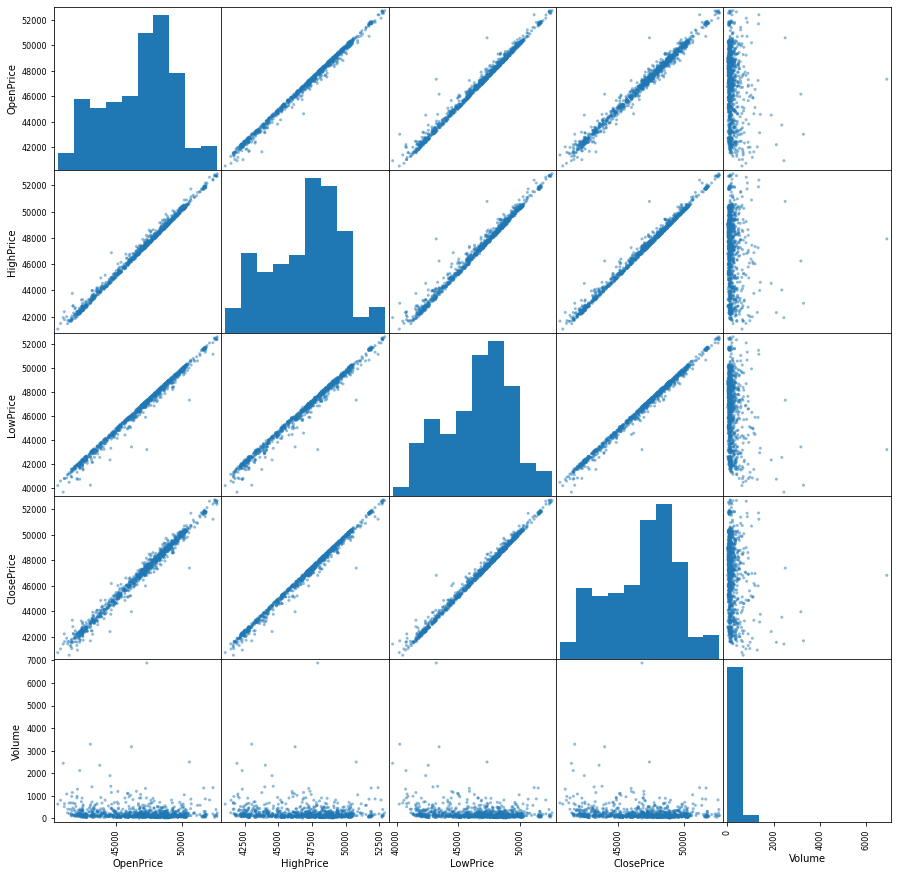

In [62]:
pd.plotting.scatter_matrix(df2, figsize = (15,15))

(0.0, 1000.0)

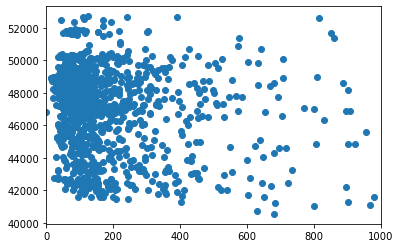

In [74]:
plt.scatter(data = df2, x = 'Volume', y = 'ClosePrice');
plt.xlim([0, 1000])

In [80]:
corMat = df2.corr(method='pearson')
corMat

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,intercept
OpenPrice,1.000000,0.996908,0.994110,0.992364,-0.120391,NaN
HighPrice,0.996908,1.000000,0.992574,0.995739,-0.097499,NaN
LowPrice,0.994110,0.992574,1.000000,0.996012,-0.199842,NaN
ClosePrice,0.992364,0.995739,0.996012,1.000000,-0.147581,NaN
Volume,-0.120391,-0.097499,-0.199842,-0.147581,1.000000,NaN
intercept,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

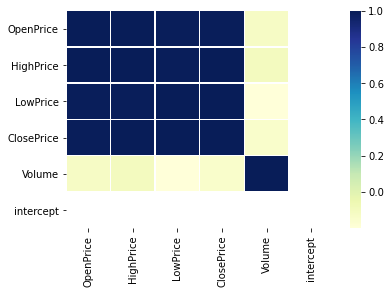

In [79]:
sb.heatmap(corMat, linewidths=.5, cmap="YlGnBu")

In [63]:
df2['intercept'] = 1
df2.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,intercept
CloseTime,,,,,,
2021-08-19 02:00:00,45052.000000,45213.000000,44881.0,44963.0,180.987398,1
2021-08-19 03:00:00,44962.722844,44962.722844,44620.0,44620.0,238.827032,1
2021-08-19 04:00:00,44620.000000,44625.000000,44090.0,44091.0,436.836885,1
2021-08-19 05:00:00,44091.000000,44336.896429,43992.0,44152.0,315.149961,1
2021-08-19 06:00:00,44157.000000,44500.000000,44049.0,44440.0,120.752527,1


In [81]:
lm = sm.OLS(df2['ClosePrice'], df2[['Volume', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClosePrice   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     22.22
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           2.78e-06
Time:                        16:30:49   Log-Likelihood:                -9294.9
No. Observations:                1000   AIC:                         1.859e+04
Df Residuals:                     998   BIC:                         1.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Volume        -1.0931      0.232     -4.714      0.000      -1.548      -0.638
intercept   4.707e+04     99.132    474.825      0.000    4.69e+04    4.73e+04
==============================================================================
Omnibus:                       47.930   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.388
Skew:                          -0.232   Prob(JB):                     1.86e-06
Kurtosis:                       2.354   Cond. No.                         508.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
lm = sm.OLS(df2['ClosePrice'], df2[['OpenPrice', 'HighPrice', 'LowPrice','Volume', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClosePrice   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.960e+04
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:10:33   Log-Likelihood:                -6361.2
No. Observations:                1000   AIC:                         1.273e+04
Df Residuals:                     995   BIC:                         1.276e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
OpenPrice     -0.6249      0.025    -24.951      0.000      -0.674      -0.576
HighPrice      0.7089      0.029     24.755      0.000       0.653       0.765
LowPrice       0.9157      0.029     31.572      0.000       0.859       0.973
Volume         0.2296      0.024      9.401      0.000       0.182       0.278
intercept     21.8819     82.478      0.265      0.791    -139.969     183.732
==============================================================================
Omnibus:                      183.833   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3872.846
Skew:                           0.092   Prob(JB):                         0.00
Kurtosis:                      12.639   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""